In [1]:
from platform import python_version

print(python_version())

3.9.13


In [2]:
!pip install refextract
! pip install tika
!pip install python-magic-bin==0.4.14
!pip install pdfx


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 178.7/178.7 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.1.0
    Uninstalling chardet-5.1.0:
      Successfully uninstalled chardet-5.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
tox 4.6.0 requires chardet>=5.1, but you have chardet 4.0.0 which is incompatible.


In [3]:
from tika import parser 
import re
from re import search
import os
import pandas as pd
from sklearn.decomposition import PCA
import pdfx


In [4]:
ARTICLE = 1
ABSTRACT = 2
REFERENCES = 3

FLAG = ARTICLE

pd.options.display.max_rows = 200
pd.set_option('display.max_colwidth', None)

In [5]:
path = "H:\\Dropbox\\Personale\\Ricerca\\XAI\\00. A.Gatti\\Quantitative AI\\GreenAI\\Articolo\\Bibliografia\TUTTI"

In [6]:
def get_content(filename):
     raw = parser.from_file(filename)
     return raw['content'].lower()

In [7]:
def get_reference(filename):
    raw = parser.from_file(filename)
    text = raw['content'].lower()

    # get only text after word `References`
    pos = text.lower().find('references')
    return text[pos+len('references '):]
    
    # print line by line
    #for line in text.split('\n\n'):
        #print(line)
        #print('---')

In [8]:
def get_references():
    short, names, articles = find_all_files()
    references = []
    
    for article in articles:
        references.append(get_reference(article))

    return short, names, articles, references

In [9]:
def get_abstract(filename):
    start = 'abstract'
    end = 'introduction'
    
    raw = parser.from_file(filename)
    s = raw['content'].lower()
    
    if search(start, s):
        s = s.split(start)[1].split(end)[0]
        #res = re.sub('[^A-Za-z0-9]+', ' ', s).strip()
        res = re.sub('[^A-Za-z]+', ' ', s).strip()
    else:
        res = ""

    return res

In [10]:
def find_all_files():
    shortnamelist =[]
    namelist =[]
    filelist = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if(file.endswith(".pdf")):
                filelist.append(os.path.join(root,file))
                name = re.sub('[^A-Z a-z]+', ' ', file).strip()
                namelist.append(name)
                shortnamelist.append(name[0:4])
    return shortnamelist, namelist, filelist

In [11]:
def get_abstracts():
    short, names, articles = find_all_files()
    abstracts = []
    
    for article in articles:
        abstracts.append(get_abstract(article))

    return short, names, articles, abstracts

In [12]:
def get_contents():
    short, names, articles = find_all_files()
    article_content = []
    
    for article in articles:
        article_content.append(get_content(article))

    return short, names, articles, article_content

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})

In [14]:
if FLAG == ARTICLE:
    shortnames, names, articles, articles_content = get_contents()
    X = vectorizer.fit_transform(articles_content)
else:
    if FLAG == ABSTRACT:
        shortnames, names, articles, abstracts = get_abstracts()
        X = vectorizer.fit_transform(abstracts)
    else:
        shortnames, names, articles, references = get_references()
        X = vectorizer.fit_transform(references)


2023-06-06 12:50:19,540 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to C:\Users\Enric\AppData\Local\Temp\tika-server.jar.
2023-06-06 12:51:04,507 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to C:\Users\Enric\AppData\Local\Temp\tika-server.jar.md5.
2023-06-06 12:51:07,791 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2023-06-06 12:51:12,804 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [15]:
for index in range(len(shortnames)):
    print(shortnames[index], names[index])

A de A definition of carbon footprint pdf
A Gr A Green er  World for A I pdf
A Lo A Logical Calculus of Ideas Immanent in Nervous Activity pdf
A Ne A New Golden Age for Computer Architecture pdf
A No A Novel Connectionist System for Unconstrained Handwriting Recognition pdf
A Pr A Primer in BERTology What We Know About How BERT Works pdf
A qu A quantitative evaluation of explainable AI methods using the depth of decision tree pdf
A Sh A Shift Invariant Neural Network for the Lung Field Segmentation in Chest Radiography pdf
A Su A Survey of Neural Network Compression pdf
A Su A Survey of Reinforcement Learning Algorithms for Dynamically Varying Environments pdf
A Su A Survey on Bias and Fairness in Machine Learning pdf
A Su A Survey on Deep Transfer Learning and Beyond pdf
A Su A Survey on Green Deep Learning pdf
A Su A Survey on Tensor Techniques and Applications in Machine Learning pdf
A Su A Survey on the Explainability of Supervised Machine Learning pdf
A Sy A Systematic Review of G

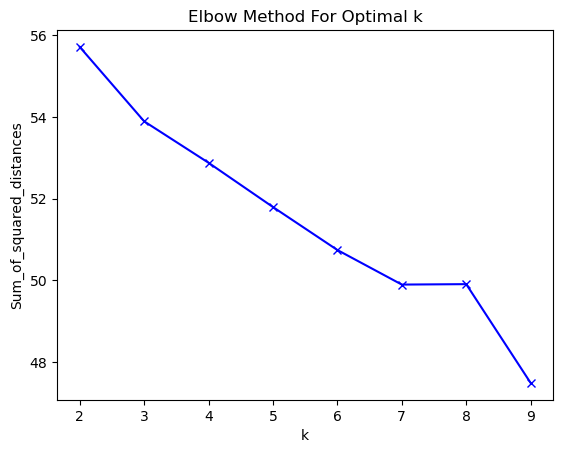

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, init='random', max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
labels

array([3, 3, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 0, 3, 2, 1, 3, 1, 0, 2,
       1, 2, 1, 3, 3, 4, 3, 2, 1, 1, 3, 1, 2, 1, 2, 2, 2, 1, 3, 3, 3, 3,
       1, 0, 2, 1, 0, 1, 1, 3, 2, 2, 4, 3, 2, 2, 1, 2, 2, 1, 3, 2, 1, 1,
       1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 3, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 3, 3, 3, 1, 3,
       1, 1, 1, 3, 3, 1, 2, 2])

In [18]:
df = pd.DataFrame(list(zip(names,labels)),columns=['Article','Cluster'])
df_s= df.sort_values(by=['Cluster'])
df_s.to_csv("clusters.csv")


In [20]:
#pdf = pdfx.PDFx("01. Energy and Policy Considerations for Deep Learning in NLP.pdf")
#metadata = pdf.get_metadata()
#references_list = pdf.get_references()
#references_dict = pdf.get_references_as_dict()
#pdf.download_pdfs("target-directory")